<a href="https://colab.research.google.com/github/prajwalkarnik08/Nutrition_Product_Abrez_Prediction/blob/main/Nutrition_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
df = pd.read_excel("2_Nutrition Sale_3 yrs_21-22, 22-23, 23-24_Monthwise.xlsx", sheet_name = "DATA (2)")

In [ ]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,NaN,Month,STATE,REGION,AREA,TERITORY,RP,District Name,Acc Code,Acc Name,...,NSA (22-23),GST (22-23),TCS (22-23),CD (22-23),NSQ (23-24),NSA (23-24),GST (23-24),TCS (23-24),CD (23-24),Product Type
1,1.0,M01_APR,MAHARASHTRA,R_AKOLA,A_AKOLA,T_AKOLA,THEN DALI (NOW NIKHIL DHABEKAR),AKOLA,MVKA01,"AMBEKAR ENTERPRISES, AKOLA",...,0,0,0,0,0,0,0,0,0,SOIL
2,2.0,M01_APR,MAHARASHTRA,R_AKOLA,A_AKOLA,T_AKOLA,THEN DALI (NOW NIKHIL DHABEKAR),AKOLA,MVKA01,"AMBEKAR ENTERPRISES, AKOLA",...,0,0,0,0,0,0,0,0,0,FOLIAR
3,3.0,M01_APR,MAHARASHTRA,R_AKOLA,A_AKOLA,T_AKOLA,THEN DALI (NOW NIKHIL DHABEKAR),AKOLA,MVKA01,"AMBEKAR ENTERPRISES, AKOLA",...,0,0,0,0,0,0,0,0,0,FOLIAR
4,4.0,M01_APR,MAHARASHTRA,R_AKOLA,A_AKOLA,T_AKOLA,THEN DALI (NOW NIKHIL DHABEKAR),AKOLA,MVKM01,"MILIND AGENCIES, AKOLA",...,17708.04,2124.96,0,0,0,0,0,0,0,FOLIAR


In [ ]:
df.iloc[0,:]
df.drop(df.iloc[:,[0,6,8,10,15,16,17,20,21,22,25,26,27]], axis = 1, inplace = True)

In [ ]:
df.head()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 7,Unnamed: 9,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 18,Unnamed: 19,Unnamed: 23,Unnamed: 24,Unnamed: 28
0,Month,STATE,REGION,AREA,TERITORY,District Name,Acc Name,Product Full Name,Product Name,NSQ (21-22),NSA (21-22),NSQ (22-23),NSA (22-23),NSQ (23-24),NSA (23-24),Product Type
1,M01_APR,MAHARASHTRA,R_AKOLA,A_AKOLA,T_AKOLA,AKOLA,"AMBEKAR ENTERPRISES, AKOLA",ANKUR VASUNDHARA (GRANULES),ANKUR VASUNDHARA (GRN) (Kg),200,13869.6,0,0,0,0,SOIL
2,M01_APR,MAHARASHTRA,R_AKOLA,A_AKOLA,T_AKOLA,AKOLA,"AMBEKAR ENTERPRISES, AKOLA",ANKUR X-CYTE,ANKUR X-CYTE (L),3.5,22211.02,0,0,0,0,FOLIAR
3,M01_APR,MAHARASHTRA,R_AKOLA,A_AKOLA,T_AKOLA,AKOLA,"AMBEKAR ENTERPRISES, AKOLA",ANKUR ZYMO LIQUID,ANKUR ZYMO (LIQ) (L),10,7932.36,0,0,0,0,FOLIAR
4,M01_APR,MAHARASHTRA,R_AKOLA,A_AKOLA,T_AKOLA,AKOLA,"MILIND AGENCIES, AKOLA",ANKUR RASNA CHELATED,ANKUR RASNA CHELATED (Kg),0,0,20,17708.04,0,0,FOLIAR


In [ ]:
df.columns
df.rename(columns={"Unnamed: 1" : "Month", "Unnamed: 2" : "State", "Unnamed: 3" : "Region",
                   "Unnamed: 4" : "Area", "Unnamed: 5" : "Territory",
                   "Unnamed: 7" : "District Name", "Unnamed: 9" : "Acc Name", "Unnamed: 11" : "Product Full Name",
                   "Unnamed: 12" : "	Product Name", "Unnamed: 13" : "NSQ (21-22)", "Unnamed: 14" : "NSA (21-22)",
                   "Unnamed: 18" : "NSQ (22-23)", "Unnamed: 19" : "NSA (22-23)", "Unnamed: 23" : "NSQ (23-24)", "Unnamed: 24" : "NSA (23-24)",
                   "Unnamed: 28" : "Product Type"}, inplace = True)

In [ ]:
df.head()

,Month,State,Region,Area,Territory,District Name,Acc Name,Product Full Name,\tProduct Name,NSQ (21-22),NSA (21-22),NSQ (22-23),NSA (22-23),NSQ (23-24),NSA (23-24),Product Type
0,Month,STATE,REGION,AREA,TERITORY,District Name,Acc Name,Product Full Name,Product Name,NSQ (21-22),NSA (21-22),NSQ (22-23),NSA (22-23),NSQ (23-24),NSA (23-24),Product Type
1,M01_APR,MAHARASHTRA,R_AKOLA,A_AKOLA,T_AKOLA,AKOLA,"AMBEKAR ENTERPRISES, AKOLA",ANKUR VASUNDHARA (GRANULES),ANKUR VASUNDHARA (GRN) (Kg),200,13869.6,0,0,0,0,SOIL
2,M01_APR,MAHARASHTRA,R_AKOLA,A_AKOLA,T_AKOLA,AKOLA,"AMBEKAR ENTERPRISES, AKOLA",ANKUR X-CYTE,ANKUR X-CYTE (L),3.5,22211.02,0,0,0,0,FOLIAR
3,M01_APR,MAHARASHTRA,R_AKOLA,A_AKOLA,T_AKOLA,AKOLA,"AMBEKAR ENTERPRISES, AKOLA",ANKUR ZYMO LIQUID,ANKUR ZYMO (LIQ) (L),10,7932.36,0,0,0,0,FOLIAR
4,M01_APR,MAHARASHTRA,R_AKOLA,A_AKOLA,T_AKOLA,AKOLA,"MILIND AGENCIES, AKOLA",ANKUR RASNA CHELATED,ANKUR RASNA CHELATED (Kg),0,0,20,17708.04,0,0,FOLIAR


In [ ]:
df.drop(0, axis = 0, inplace = True)

In [ ]:
# Convert "Month" to a datetime format
# df["Month"] = pd.to_datetime(df["Month"], format="%Y-%m")  # Original line causing the error



# Convert "Month" to a datetime format
df["Month"] = pd.to_datetime(df["Month"], errors='coerce')
# If your Month column has varying date formats, set errors='coerce' to handle invalid dates.

# Convert to the desired format if needed
df["Month"] = df["Month"].dt.strftime("%m-%Y")

# Filter for "ANKUR ABREZ"
df_product = df[df["\tProduct Name"] == "ANKUR ABREZ (L)"].copy()

# Sort by date
df_product = df_product.sort_values(by="Month")

# Extract relevant columns
df_product = df_product[["Month", "NSQ (21-22)"]]

<ipython-input-67-496b9a5a1a33>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Month"] = pd.to_datetime(df["Month"], errors='coerce')


In [ ]:
# Convert "Month" to a datetime format
df["Month"] = pd.to_datetime(df["Month"], errors='coerce')
# If your Month column has varying date formats, set errors='coerce' to handle invalid dates.

# ***Remove this line***
# df["Month"] = df["Month"].dt.strftime("%m-%Y")

# Filter for "ANKUR ABREZ"
df_product = df[df["\tProduct Name"] == "ANKUR ABREZ (L)"].copy()

# Sort by date
#***Sort by datetime object instead of string***
df_product = df_product.sort_values(by="Month")

# Extract relevant columns
df_product = df_product[["Month", "NSQ (21-22)"]]

# Create feature columns
df_product["Year"] = df_product["Month"].dt.year
df_product["Month_Num"] = df_product["Month"].dt.month
df_product["Lag_1"] = df_product["NSQ (21-22)"].shift(1)  # Last month's sales
df_product["Rolling_3"] = df_product["NSQ (21-22)"].rolling(window=3).mean()  # 3-month avg
df_product["Rolling_6"] = df_product["NSQ (21-22)"].rolling(window=6).mean()  # 6-month avg
df_product["Cumulative_Sum"] = df_product["NSQ (21-22)"].cumsum()  # Growing trend

# Drop NaN values from rolling window shifts
df_product.dropna(inplace=True)

# Define Feature Matrix (X) & Target Variable (y)
X = df_product[["Year", "Month_Num", "Lag_1", "Rolling_3", "Rolling_6", "Cumulative_Sum"]].values
y = df_product["NSQ (21-22)"].values

🔹 Random Forest R² Score: 0.8275
🔹 XGBoost R² Score: 0.9302
🔹 Linear Regression R² Score: 0.5141


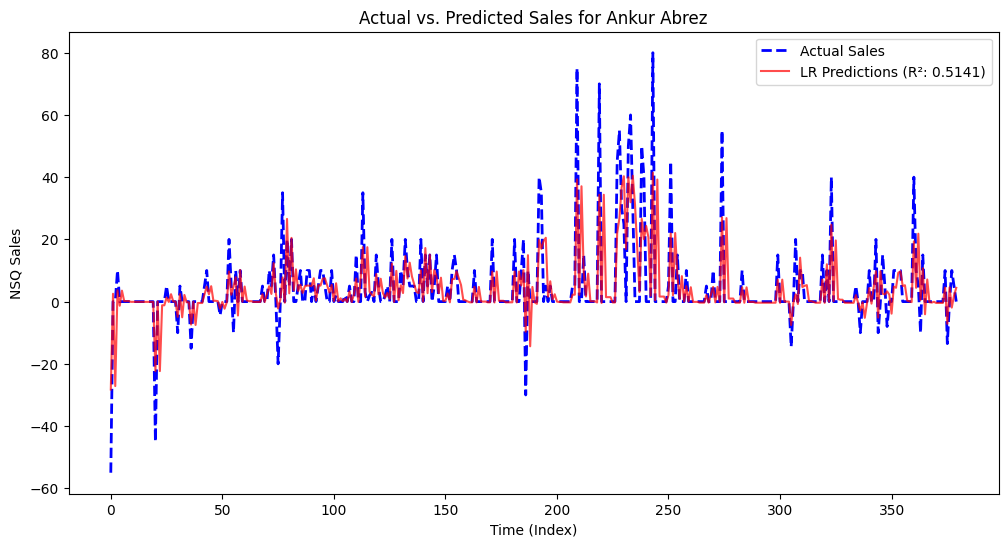

In [ ]:
# Train Random Forest Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)
y_pred_rf = rf.predict(X)

# Train XGBoost Model
xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(X, y)
y_pred_xgb = xgb.predict(X)

# Train Linear Regression Model
lr = LinearRegression()
lr.fit(X, y)
y_pred_lr = lr.predict(X)

# R² Scores
r2_rf = r2_score(y, y_pred_rf)
r2_xgb = r2_score(y, y_pred_xgb)
r2_lr = r2_score(y, y_pred_lr)

print(f"🔹 Random Forest R² Score: {r2_rf:.4f}")
print(f"🔹 XGBoost R² Score: {r2_xgb:.4f}")
print(f"🔹 Linear Regression R² Score: {r2_lr:.4f}")

plt.figure(figsize=(12, 6))

# Plot Actual Values
plt.plot(y, label="Actual Sales", color="blue", linestyle="dashed", linewidth=2)

# Plot Predictions
#plt.plot(y_pred_rf, label=f"RF Predictions (R²: {r2_rf:.4f})", color="blue", alpha=0.7)
#plt.plot(y_pred_xgb, label=f"XGB Predictions (R²: {r2_xgb:.4f})", color="red", alpha=0.7)
plt.plot(y_pred_lr, label=f"LR Predictions (R²: {r2_lr:.4f})", color="red", alpha=0.7)

# Labels and Title
plt.xlabel("Time (Index)")
plt.ylabel("NSQ Sales")
plt.title("Actual vs. Predicted Sales for Ankur Abrez")
plt.legend()
plt.show()

R² Score: 0.0233


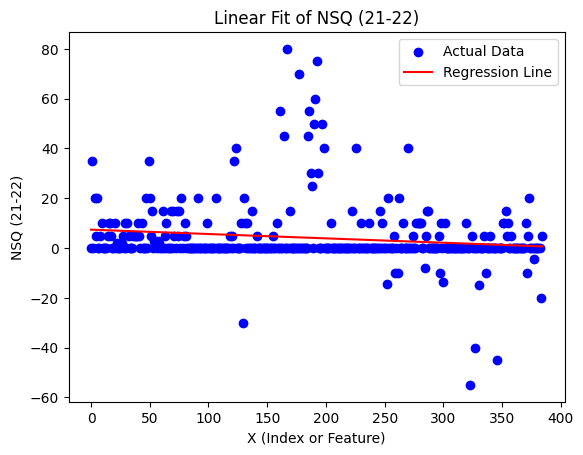

In [ ]:
filtered_data = df[df.iloc[:,8] == "ANKUR ABREZ (L)"][["NSQ (21-22)"]]

# Define X (Independent) and y (Dependent)
X = np.arange(len(filtered_data)).reshape(-1, 1)  # Using index as independent variable
y = filtered_data["NSQ (21-22)"].values  # Dependent variable

# Fit Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Predict values
y_pred = model.predict(X)

# Calculate R² (Coefficient of Determination)
r2 = r2_score(y, y_pred)
print(f"R² Score: {r2:.4f}")

plt.scatter(X, y, color='blue', label="Actual Data")
plt.plot(X, y_pred, color='red', label="Regression Line")
plt.xlabel("X (Index or Feature)")
plt.ylabel("NSQ (21-22)")
plt.legend()
plt.title("Linear Fit of NSQ (21-22)")
plt.show()

🔹 Random Forest R² Score: 0.8423


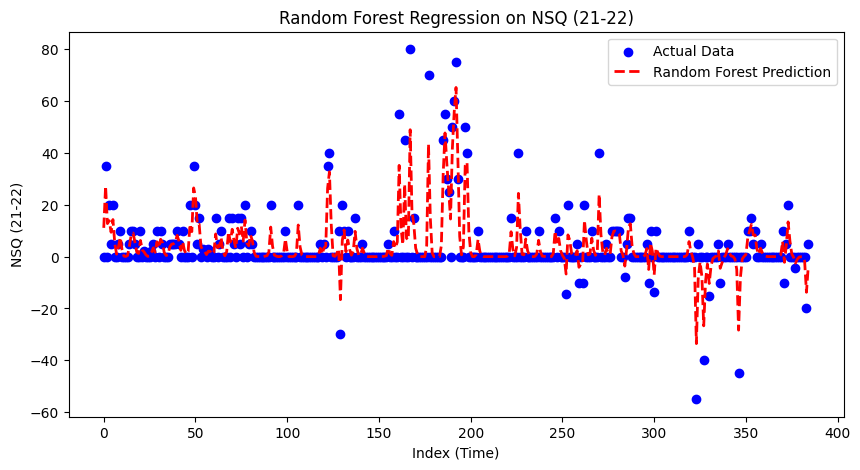

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Filter Data
filtered_data = df[df.iloc[:, 8] == "ANKUR ABREZ (L)"][["NSQ (21-22)"]]

# Define X (Independent) and y (Dependent)
X = np.arange(len(filtered_data)).reshape(-1, 1)  # Using index as independent variable
y = filtered_data["NSQ (21-22)"].values  # Dependent variable

# Train Random Forest Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Predict values
y_pred = rf.predict(X)

# Calculate R² Score
r2_rf = r2_score(y, y_pred)
print(f"🔹 Random Forest R² Score: {r2_rf:.4f}")

# Plot Actual vs. Predicted
plt.figure(figsize=(10, 5))
plt.scatter(X, y, color='blue', label="Actual Data")
plt.plot(X, y_pred, color='red', linestyle="dashed", linewidth=2, label="Random Forest Prediction")
plt.xlabel("Index (Time)")
plt.ylabel("NSQ (21-22)")
plt.legend()
plt.title("Random Forest Regression on NSQ (21-22)")
plt.show()


🔹 Random Forest R² Score: 0.8052
🔹 XGBoost R² Score: 0.8871


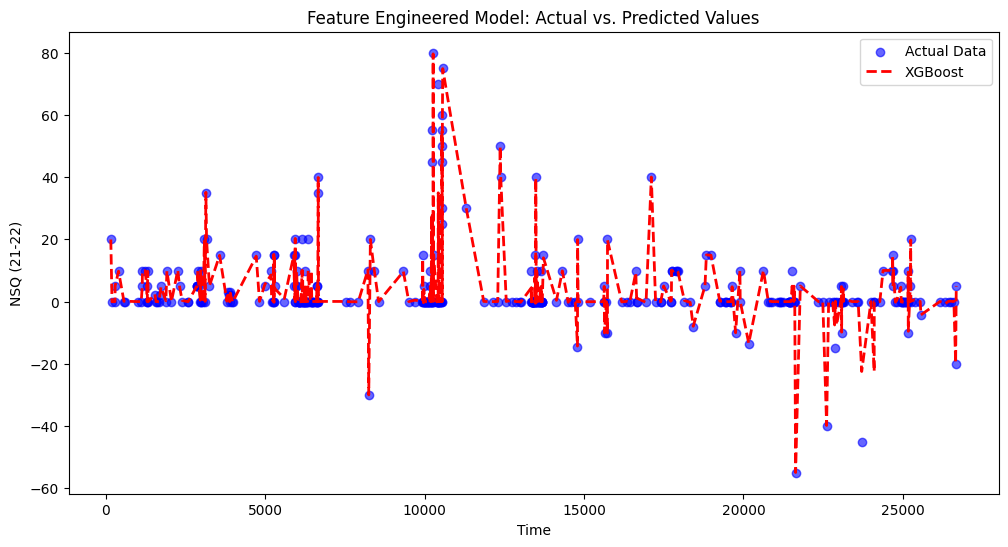

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

# Filter Data for 'ANKUR ABREZ (L)'
filtered_data = df[df.iloc[:, 8] == "ANKUR ABREZ (L)"].copy()

# Convert index to datetime if available
filtered_data['Date'] = pd.to_datetime(filtered_data.index)

# Extract features
filtered_data["Month"] = filtered_data["Date"].dt.month  # Extract month
filtered_data["Year"] = filtered_data["Date"].dt.year  # Extract year
filtered_data["Lag_1"] = filtered_data["NSQ (21-22)"].shift(1)  # Last month's sales
filtered_data["Rolling_3"] = filtered_data["NSQ (21-22)"].rolling(window=3).mean()  # 3-month avg
filtered_data["Rolling_6"] = filtered_data["NSQ (21-22)"].rolling(window=6).mean()  # 6-month avg
filtered_data["Cumulative_Sum"] = filtered_data["NSQ (21-22)"].cumsum()  # Growing trend

# Drop NaN values (from rolling window shifts)
filtered_data.dropna(inplace=True)

# Define X (Feature Matrix) and y (Target)
X = filtered_data[["Month", "Year", "Lag_1", "Rolling_3", "Rolling_6", "Cumulative_Sum"]].values
y = filtered_data["NSQ (21-22)"].values
"""
# Train Random Forest Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)
y_pred_rf = rf.predict(X)"""

# Train XGBoost Model
xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(X, y)
y_pred_xgb = xgb.predict(X)

# R² Scores
#r2_rf = r2_score(y, y_pred_rf)
r2_xgb = r2_score(y, y_pred_xgb)

print(f"🔹 Random Forest R² Score: {r2_rf:.4f}")
print(f"🔹 XGBoost R² Score: {r2_xgb:.4f}")

# Plot Actual vs. Predicted
plt.figure(figsize=(12, 6))
plt.scatter(filtered_data.index, y, color='blue', label="Actual Data", alpha=0.6)
#plt.plot(filtered_data.index, y_pred_rf, color='red', linestyle="dashed", linewidth=2, label="Random Forest")
plt.plot(filtered_data.index, y_pred_xgb, color='red', linestyle="dashed", linewidth=2, label="XGBoost")
plt.xlabel("Time")
plt.ylabel("NSQ (21-22)")
plt.legend()
plt.title("Feature Engineered Model: Actual vs. Predicted Values")
plt.show()


🔹 Random Forest R² Score: 0.8423
🔹 Linear Regression R² Score: 0.0233
🔹 XGBoost R² Score: 0.7497


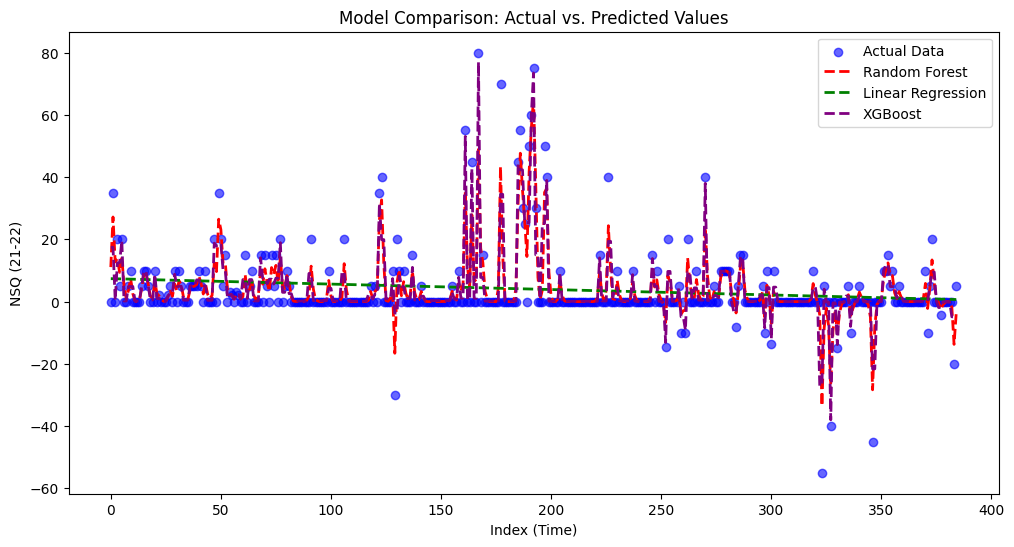

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

# Filter Data
filtered_data = df[df.iloc[:, 8] == "ANKUR ABREZ (L)"][["NSQ (21-22)"]]

# Define X (Index as Feature) and y (Target)
X = np.arange(len(filtered_data)).reshape(-1, 1)  # Using index as independent variable
y = filtered_data["NSQ (21-22)"].values  # Dependent variable

# Train Random Forest Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)
y_pred_rf = rf.predict(X)

# Train Linear Regression Model
lr = LinearRegression()
lr.fit(X, y)
y_pred_lr = lr.predict(X)

# Train XGBoost Model
xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(X, y)
y_pred_xgb = xgb.predict(X)

# R² Scores
r2_rf = r2_score(y, y_pred_rf)
r2_lr = r2_score(y, y_pred_lr)
r2_xgb = r2_score(y, y_pred_xgb)

print(f"🔹 Random Forest R² Score: {r2_rf:.4f}")
print(f"🔹 Linear Regression R² Score: {r2_lr:.4f}")
print(f"🔹 XGBoost R² Score: {r2_xgb:.4f}")

# Plot Actual vs. Predicted
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', label="Actual Data", alpha=0.6)
plt.plot(X, y_pred_rf, color='red', linestyle="dashed", linewidth=2, label="Random Forest")
plt.plot(X, y_pred_lr, color='green', linestyle="dashed", linewidth=2, label="Linear Regression")
plt.plot(X, y_pred_xgb, color='purple', linestyle="dashed", linewidth=2, label="XGBoost")
plt.xlabel("Index (Time)")
plt.ylabel("NSQ (21-22)")
plt.legend()
plt.title("Model Comparison: Actual vs. Predicted Values")
plt.show()
